   # STOCK PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df= pd.read_csv(r"C:\Users\DIBYOJIT\OneDrive\Documents\stocks.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.shape

(1009, 7)

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
df['Date_day']= pd.to_datetime(df['Date']).dt.day
df['Date_month']= pd.to_datetime(df['Date']).dt.month
df['Date_year']= pd.to_datetime(df['Date']).dt.year

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_day,Date_month,Date_year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


In [8]:
df['Date_month'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

In [9]:
df['Date_year'].unique()

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [10]:
df.drop(['Date'], axis=1, inplace=True)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date_day,Date_month,Date_year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


In [12]:
plt.style.use('dark_background')

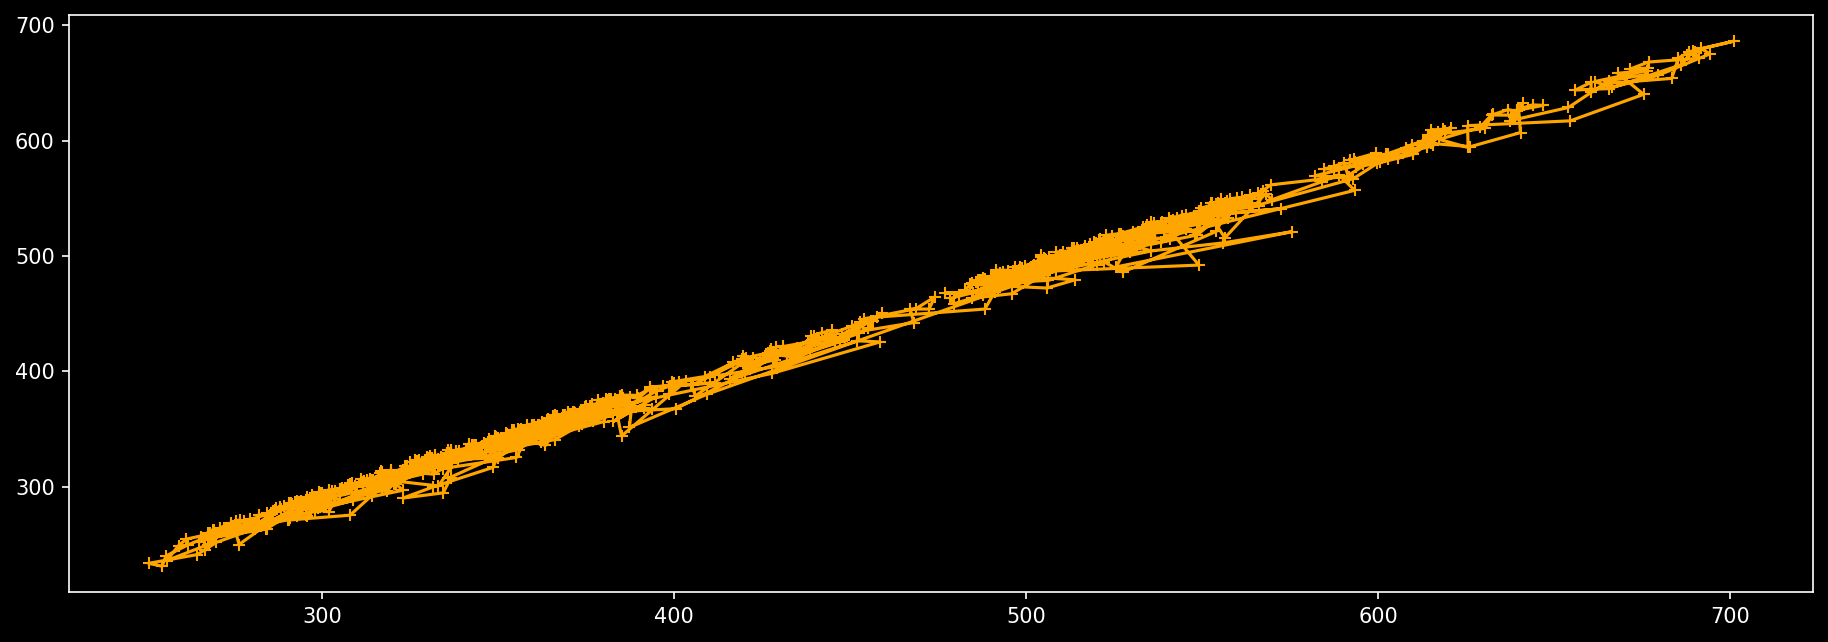

In [13]:
plt.figure(figsize=(15,5), dpi=150)
plt.plot(df['High'], df['Low'], color='orange', marker='+')

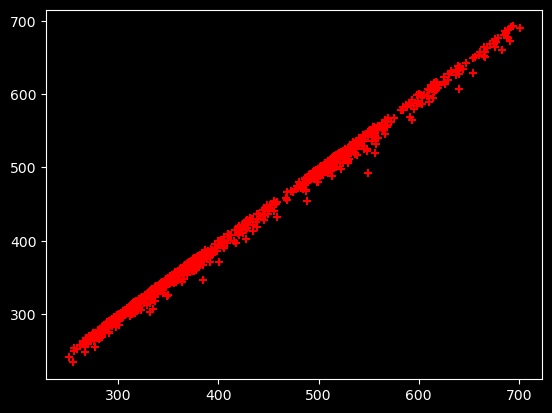

In [16]:
plt.scatter(df['High'], df['Open'], color='red', marker='+')

<Axes: >

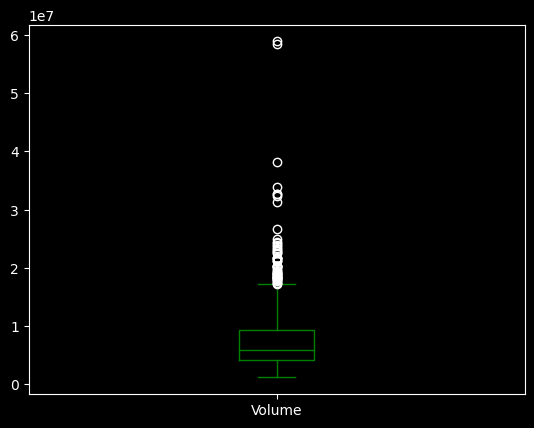

In [15]:
df['Volume'].plot(kind='box', color='green')

In [17]:
q1= df['Volume'].quantile(0.25)
q3= df['Volume'].quantile(0.75)
q1,q3

(4091900.0, 9322400.0)

In [18]:
iqr= q3-q1
iqr

5230500.0

In [19]:
u_lim= q3+1.5*iqr
u_lim

17168150.0

In [20]:
df['Volume']= np.where(df['Volume']>u_lim, u_lim, df['Volume'])

<Axes: >

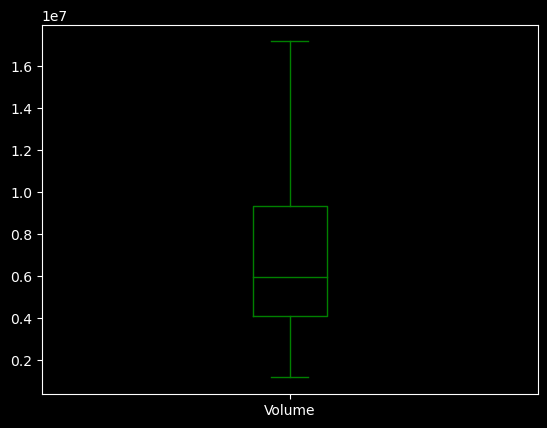

In [21]:
df['Volume'].plot(kind='box', color='green')

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date_day,Date_month,Date_year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0,9,2,2018


<Axes: ylabel='Frequency'>

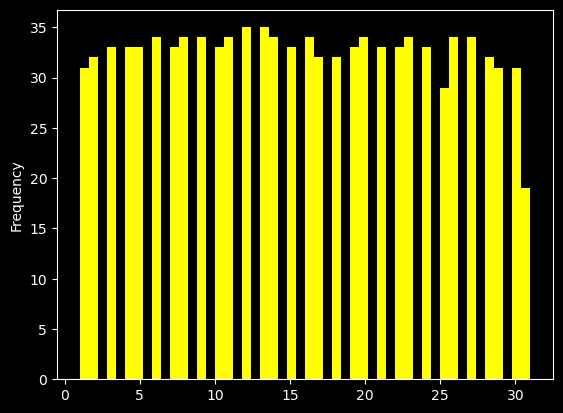

In [27]:
df['Date_day'].plot(kind='hist', color='yellow', bins= 50)

In [28]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Date_day      0
Date_month    0
Date_year     0
dtype: int64

## Predicting the High Variable

In [34]:
x1= df.drop(['High'], axis=1)
y1= df['High']
x1.head()

,Open,Low,Close,Adj Close,Volume,Date_day,Date_month,Date_year
0,262.000000,250.029999,254.259995,254.259995,11896100.0,5,2,2018
1,247.699997,245.000000,265.720001,265.720001,12595800.0,6,2,2018
2,266.579987,264.329987,264.559998,264.559998,8981500.0,7,2,2018
3,267.079987,250.000000,250.100006,250.100006,9306700.0,8,2,2018
4,253.850006,236.110001,249.470001,249.470001,16906900.0,9,2,2018


In [35]:
y1

0       267.899994
1       266.700012
2       272.450012
3       267.619995
4       255.800003
           ...    
1004    427.700012
1005    458.480011
1006    451.980011
1007    429.260010
1008    412.769989
Name: High, Length: 1009, dtype: float64

In [37]:
from sklearn.preprocessing import StandardScaler
scaled= StandardScaler()
x_scaled=scaled.fit_transform(x1)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y1, test_size=0.2, random_state= 100)

In [40]:
len(x_train)

807

In [41]:
len(x_test)

202

In [42]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
pred= lr.predict(x_test)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
print("R squared error is :", r2_score(y_test, pred))
print("Mean squared Error is:", mean_squared_error(y_test, pred))

R squared error is : 0.9990175283065605
Mean squared Error is: 11.131025187477148


In [46]:
RMSE= (mean_squared_error(y_test, pred)**0.5)
print('RMSE is :', RMSE)

RMSE is : 3.336319107561078


In [45]:
lr.score(x_test, y_test)

0.9990175283065605

## Predicting Low variable

In [47]:
x2= df.drop(['Low'], axis=1)
y2= df['Low']
x2.head()

,Open,High,Close,Adj Close,Volume,Date_day,Date_month,Date_year
0,262.000000,267.899994,254.259995,254.259995,11896100.0,5,2,2018
1,247.699997,266.700012,265.720001,265.720001,12595800.0,6,2,2018
2,266.579987,272.450012,264.559998,264.559998,8981500.0,7,2,2018
3,267.079987,267.619995,250.100006,250.100006,9306700.0,8,2,2018
4,253.850006,255.800003,249.470001,249.470001,16906900.0,9,2,2018


In [48]:
from sklearn.preprocessing import StandardScaler
scaled= StandardScaler()
x_scaled2=scaled.fit_transform(x2)

In [50]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2= train_test_split(x_scaled2, y2, test_size=0.2, random_state= 100)

In [51]:
lr= LinearRegression()
lr.fit(x_train2, y_train2)

LinearRegression()

In [52]:
pred2= lr.predict(x_test2)

In [53]:
print("R squared score is", r2_score(y_test2, pred2))
print("Mean squared Error is", mean_squared_error(y_test2, pred2))

R squared score is 0.9987786582172611
Mean squared Error is 13.426916135964168


In [64]:
RMSE= (mean_squared_error(y_test2, pred2)**0.5)
print('RMSE is :', RMSE)

RMSE is : 3.664275663206054


In [54]:
lr.score(x_test, y_test)

0.9827539519398709

## Predicting Adj. Close Variable

In [56]:
x3= df.drop(['Adj Close'], axis=1)
y3= df['Adj Close']
x3.head()

,Open,High,Low,Close,Volume,Date_day,Date_month,Date_year
0,262.000000,267.899994,250.029999,254.259995,11896100.0,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,12595800.0,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,8981500.0,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,9306700.0,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,16906900.0,9,2,2018


In [57]:
from sklearn.preprocessing import StandardScaler
scaled= StandardScaler()
x_scaled3=scaled.fit_transform(x3)

In [58]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3= train_test_split(x_scaled3, y3, test_size=0.2, random_state= 100)

In [59]:
lr= LinearRegression()
lr.fit(x_train3, y_train3)

LinearRegression()

In [60]:
pred3= lr.predict(x_test3)

In [61]:
print("R squared score is", r2_score(y_test3, pred3))
print("Mean squared Error is", mean_squared_error(y_test3, pred3))

R squared score is 1.0
Mean squared Error is 1.5036157483753211e-27


In [62]:
RMSE= (mean_squared_error(y_test3, pred3)**0.5)
print('RMSE is :', RMSE)

RMSE is : 3.877648447674597e-14


In [63]:
lr.score(x_test3, y_test3)

1.0